In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('covid.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [20]:
df['Date'].value_counts()

2020-04-21    188
2020-04-17    188
2020-03-14    188
2020-05-20    188
2020-03-18    188
             ... 
2020-05-19    188
2020-02-06    188
2020-03-01    188
2020-01-30    188
2020-04-15    188
Name: Date, Length: 126, dtype: int64

In [21]:
from pandas import DataFrame
df = DataFrame(df)
conf = df.sort_values(['Confirmed'], ascending=[False])

In [22]:
conf

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23486,2020-05-25,US,1662302,379157,98220
23298,2020-05-24,US,1643246,366736,97720
23110,2020-05-23,US,1622612,361239,97087
22922,2020-05-22,US,1600937,350135,95979
...,...,...,...,...,...
5661,2020-02-21,Bosnia and Herzegovina,0,0,0
5662,2020-02-21,Botswana,0,0,0
5663,2020-02-21,Brazil,0,0,0
5664,2020-02-21,Brunei,0,0,0


In [23]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [24]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [25]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


In [26]:
df['Difference']=(df["Confirmed"]- df["Recovered"])
print(df[['Difference','Country']])

       Difference             Country
0               0         Afghanistan
1               0             Albania
2               0             Algeria
3               0             Andorra
4               0              Angola
...           ...                 ...
23683          64  West Bank and Gaza
23684           3      Western Sahara
23685         239               Yemen
23686         584              Zambia
23687          31            Zimbabwe

[23688 rows x 2 columns]


In [27]:
diff = df.sort_values(['Difference'], ascending=[False])
diff

,Date,Country,Confirmed,Recovered,Deaths,Difference
23674,2020-05-26,US,1680913,384902,98913,1296011
23486,2020-05-25,US,1662302,379157,98220,1283145
22734,2020-05-21,US,1577147,298418,94702,1278729
23298,2020-05-24,US,1643246,366736,97720,1276510
23110,2020-05-23,US,1622612,361239,97087,1261373
...,...,...,...,...,...,...
5636,2020-02-20,Western Sahara,0,0,0,0
5635,2020-02-20,West Bank and Gaza,0,0,0,0
5633,2020-02-20,Venezuela,0,0,0,0
5632,2020-02-20,Uzbekistan,0,0,0,0


In [28]:
us = df[df.Country == 'US']
us= us.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()
us.head(10)

<ipython-input-28-9d32559058f7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  us= us.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()


,Date,Recovered,Confirmed,Deaths
0,2020-01-22,0,1,0
1,2020-01-23,0,1,0
2,2020-01-24,0,2,0
3,2020-01-25,0,2,0
4,2020-01-26,0,5,0
5,2020-01-27,0,5,0
6,2020-01-28,0,5,0
7,2020-01-29,0,5,0
8,2020-01-30,0,5,0
9,2020-01-31,0,7,0


In [29]:
uk = df[df.Country == 'United Kingdom']
uk = uk.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()
uk.tail(10)

<ipython-input-29-9df2f9e155ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk = uk.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()


,Date,Recovered,Confirmed,Deaths
116,2020-05-17,1058,244995,34716
117,2020-05-18,1090,247709,34876
118,2020-05-19,1099,250138,35422
119,2020-05-20,1116,249619,35786
120,2020-05-21,1134,252246,36124
121,2020-05-22,1142,255544,36475
122,2020-05-23,1149,258504,36757
123,2020-05-24,1151,260916,36875
124,2020-05-25,1161,262547,36996
125,2020-05-26,1161,266599,37130


In [30]:
brasil = df[df.Country == 'Brazil']
brasil = brasil.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()
#brasil.tail(10)

<ipython-input-30-d052a871c0e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brasil = brasil.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()


In [31]:
russia = df[df.Country == 'Russia']
russia = russia.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()
#russia.tail(10)

<ipython-input-31-53102ebdad8f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  russia = russia.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()


In [32]:
italy = df[df.Country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()
#italy.tail(10)

<ipython-input-32-7543a23c63af>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  italy = italy.groupby(by='Date')['Recovered','Confirmed','Deaths'].sum().reset_index()


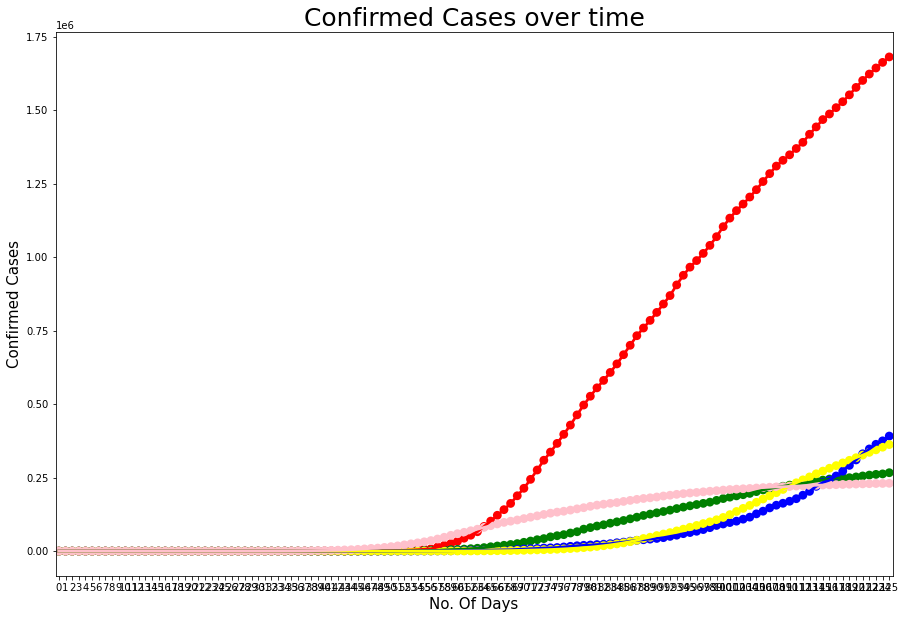

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.pointplot(us.index,us.Confirmed,color="Red")
sns.pointplot(uk.index,uk.Confirmed,color="Green")
sns.pointplot(brasil.index,brasil.Confirmed,color="Blue")
sns.pointplot(russia.index,russia.Confirmed,color="Yellow")
sns.pointplot(italy.index,italy.Confirmed,color="Pink")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()